In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [57]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


# Work in categorical columns

## Clarity column

In [58]:
diamonds.clarity.unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [59]:
cat_price=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['clarity'] = diamonds['clarity'].apply(lambda x: 1+ (cat_price.index(x)))

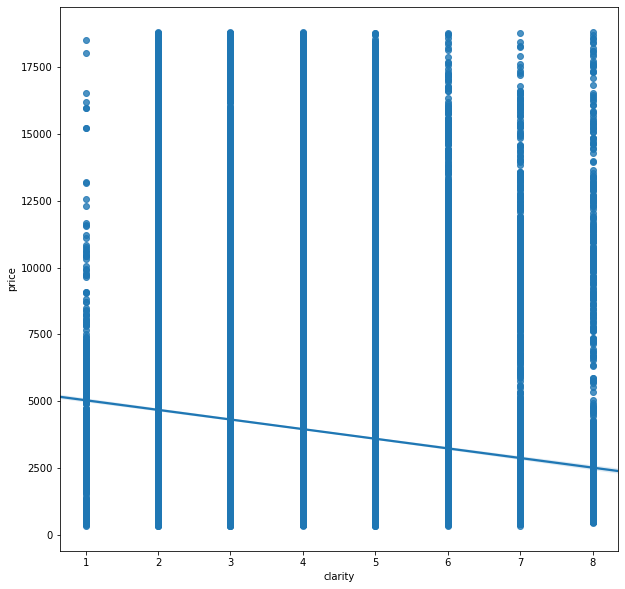

In [61]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.clarity, diamonds.price, scatter=True)


In [62]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.clarity, diamonds.price)
r2 = r_value ** 2
r2

0.0221022293083401

## Color

In [72]:
color_list = sorted(list(diamonds.color.unique()),reverse=True)
diamonds['color'] = diamonds['color'].apply(lambda x: 1+ (color_list.index(x)))

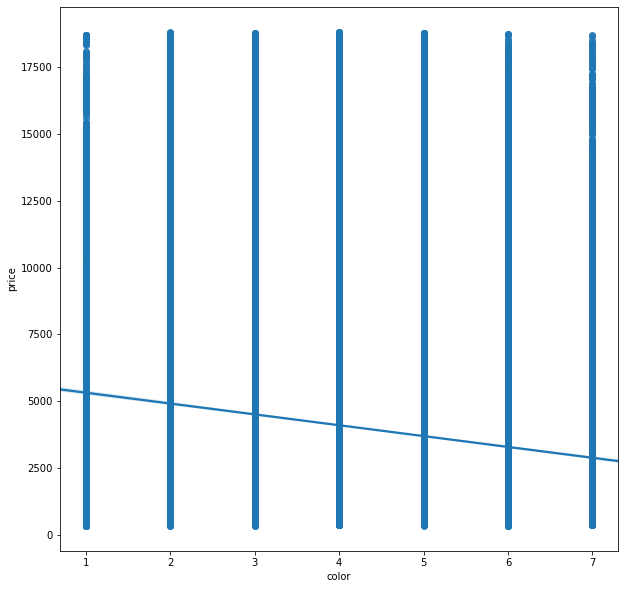

In [75]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.color, diamonds.price, scatter=True)

In [76]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.color, diamonds.price)
r2 = r_value ** 2
r2

0.029973814519239396

## Cut

In [80]:
cut_price = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds['cut'] = diamonds['cut'].apply(lambda x: 1+ (cut_price.index(x)))

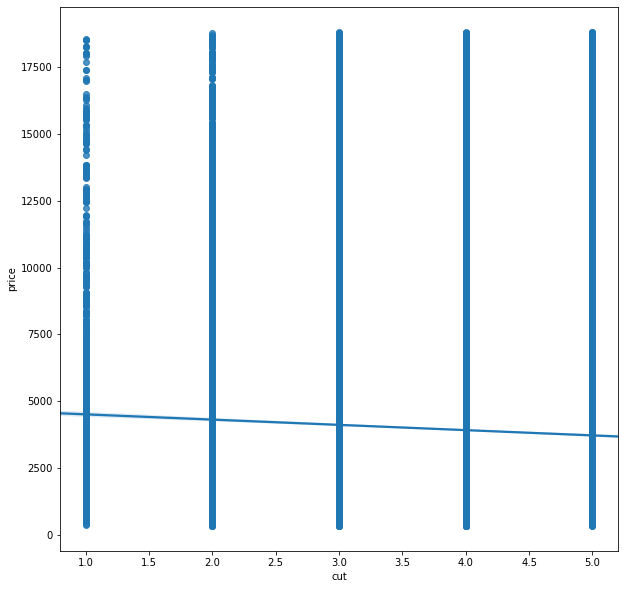

In [81]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.cut, diamonds.price, scatter=True)

In [82]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.color, diamonds.price)
r2 = r_value ** 2
r2

0.029973814519239396

## Treinando e Testando

### Com todas as cat

In [195]:
y= diamonds['price']
X= diamonds[['carat','cut','color','clarity','depth','table','x','y','z']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.238e+04
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:50:41   Log-Likelihood:            -3.3370e+05
No. Observations:               39152   AIC:                         6.674e+05
Df Residuals:                   39142   BIC:                         6.675e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1744.0440    506.992      3.440      0.0

C:\Users\pedro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [196]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_test)
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(3)}')
print(f'Erro² = {np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)}')

R² = 0.891
Erro² = 1315.947


### Filtrando as com confiança menor que 95%

In [203]:
y= diamonds['price']
X= diamonds[['carat','cut','color','clarity','depth','table','x','y','z']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.238e+04
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:55:40   Log-Likelihood:            -3.3370e+05
No. Observations:               39152   AIC:                         6.674e+05
Df Residuals:                   39142   BIC:                         6.675e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1744.0440    506.992      3.440      0.0

C:\Users\pedro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [204]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_test)
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(3)}')
print(f'Erro² = {np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)}')

R² = 0.891
Erro² = 1315.947


In [279]:
columns = diamonds.columns
columns_zero = [column for column in columns if ((diamonds[column]==0).sum())> 0]
mask = ((diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0))
diamonds_log = diamonds.loc[~mask,:]
diamonds_log = np.log(diamonds_log)
diamonds_log

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.560648,1.386294,1.791759,1.098612,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
1,-1.469676,0.693147,1.791759,1.609438,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248
2,-1.237874,1.386294,0.693147,1.386294,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
3,-1.171183,0.693147,0.000000,0.693147,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601
4,-1.427116,1.098612,0.000000,1.791759,4.139955,4.043051,5.817111,1.371181,1.376244,0.908259
...,...,...,...,...,...,...,...,...,...,...
48935,-0.328504,1.386294,1.945910,1.098612,4.138361,4.077537,7.921898,1.738710,1.745716,1.275363
48936,-0.328504,1.609438,1.945910,1.098612,4.107590,4.043051,7.921898,1.749200,1.750937,1.252763
48937,-0.328504,0.693147,1.945910,1.098612,4.144721,4.007333,7.921898,1.738710,1.749200,1.283708
48938,-0.356675,1.098612,1.945910,1.098612,4.139955,4.094345,7.921898,1.733424,1.736951,1.269761


In [298]:
y= diamonds_log['price']
X= diamonds_log[['carat','cut','color','clarity','depth','table']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.578e+05
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:54:41   Log-Likelihood:                 22597.
No. Observations:               39137   AIC:                        -4.518e+04
Df Residuals:                   39130   BIC:                        -4.512e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9649      0.199     39.993      0.0

C:\Users\pedro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [299]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_test)
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(3)}')
print(f'Erro² = {np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)}')

R² = 0.982
Erro² = 0.135


In [300]:
X= diamonds_log[['carat','cut','color','clarity','depth','table']]
y_predict = modelo.predict(X)
y_predict = np.exp(y_predict)
y_real = np.exp(diamonds_log['price'])
metrics.r2_score(y_real, y_predict)
np.sqrt(metrics.mean_squared_error(y_real, y_predict))

811.0426783451574

In [307]:
columns = rick_log.columns
columns_zero = [column for column in columns if ((rick_log[column]==0).sum())> 0]
columns_zero

[]

In [313]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick_log = rick_diamonds[['carat','cut','color','clarity','depth','table']]
cat_price=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
rick_log['clarity'] = rick_log['clarity'].apply(lambda x: 1+ (cat_price.index(x)))
color_list = sorted(list(rick_log.color.unique()),reverse=True)
rick_log['color'] = rick_log['color'].apply(lambda x: 1+ (color_list.index(x)))
cut_price = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
rick_log['cut'] = rick_log['cut'].apply(lambda x: 1+ (cut_price.index(x)))

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [315]:
rick_log = np.log(rick_log)
X= rick_log
y_predict = modelo.predict(X)

In [317]:
np.exp(y_predict)

array([2846.2532489 ,  854.49017965, 1457.24096243, ..., 4868.74872283,
        829.05544933,  750.35481153])